<a href="https://colab.research.google.com/github/Hema-14052005/Hema-14052005/blob/main/crop_prediction_by_weather_and_soil_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First five rows of crop dataset
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
crop dataset shape
(2200, 8)
crop dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   

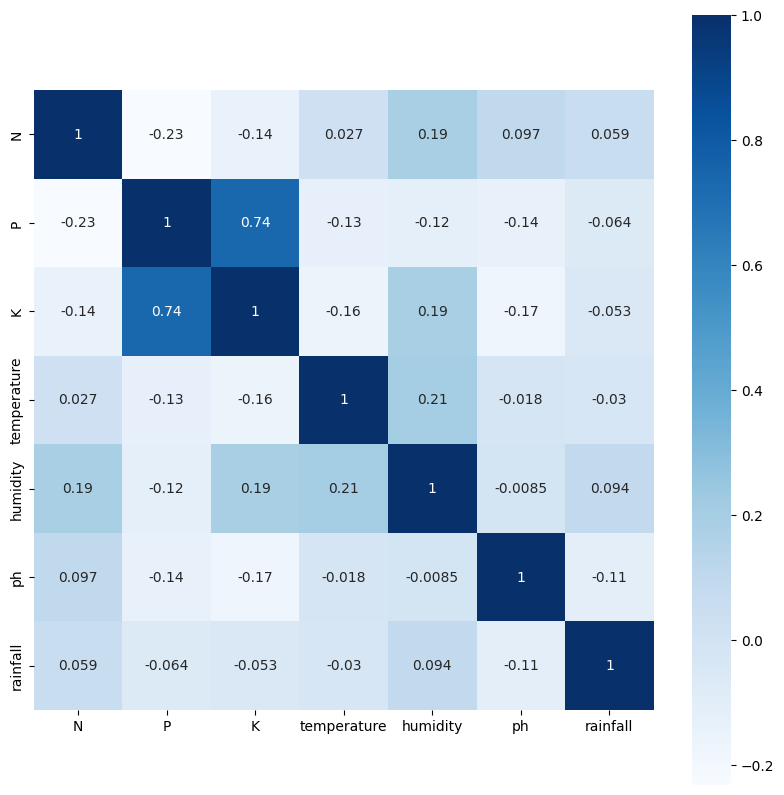

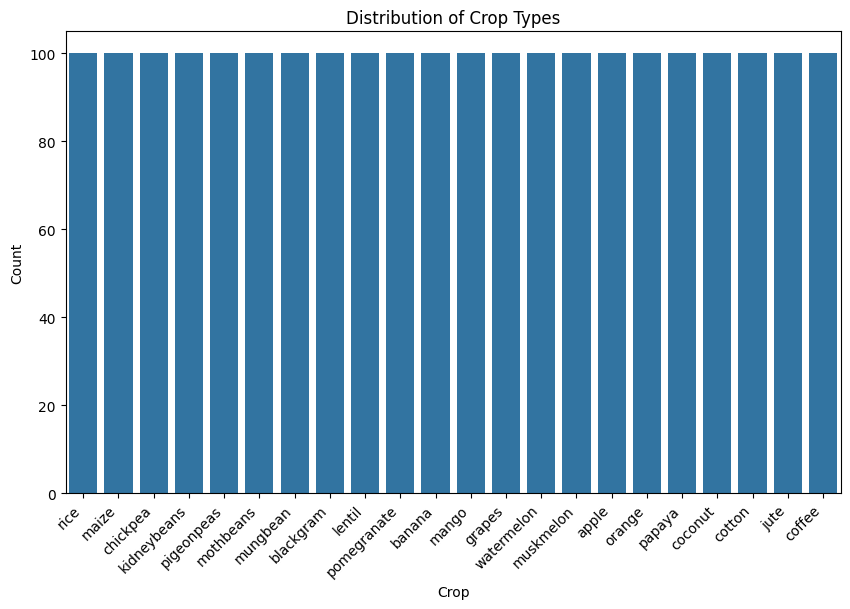

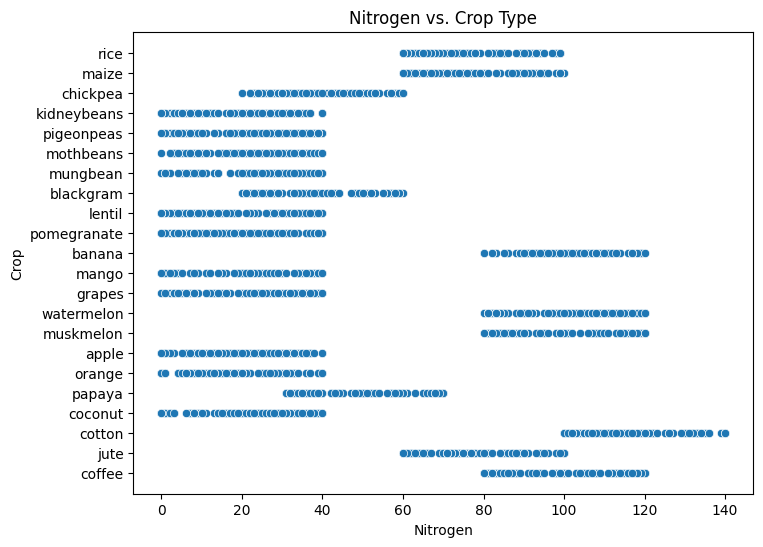

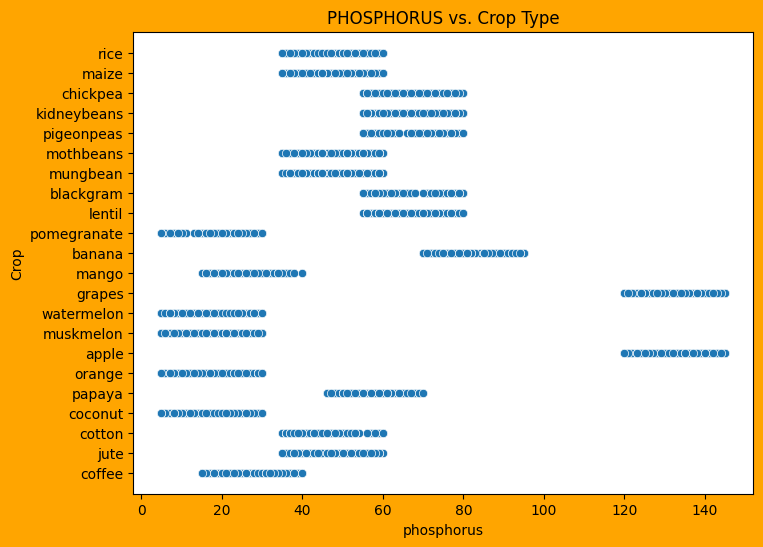

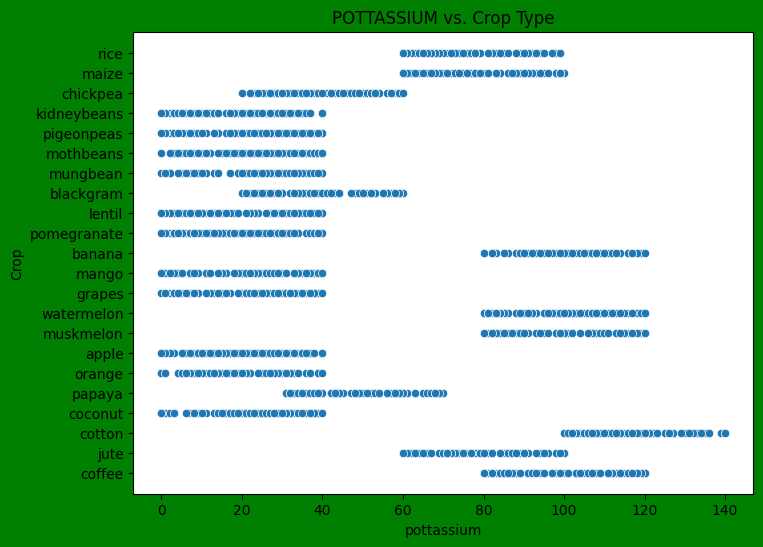

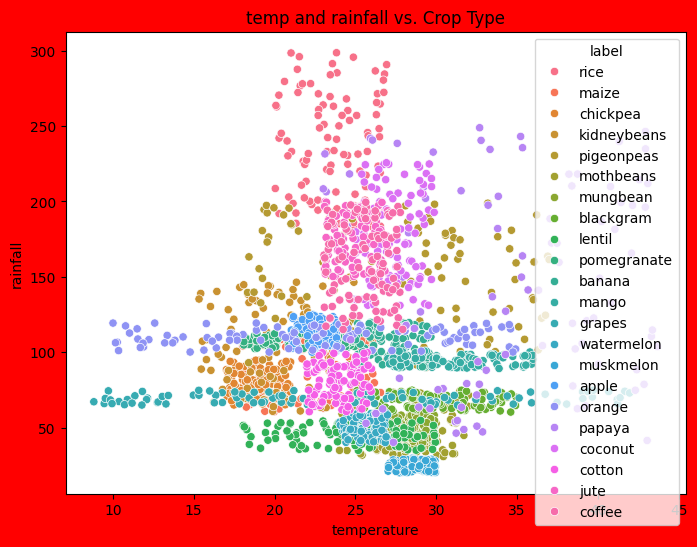


        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]
0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object


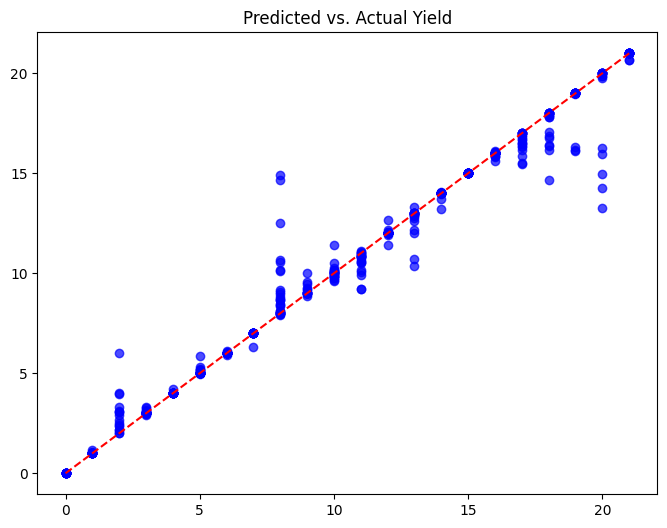

1.Nitrogen
60
2.phosphorus
45
3.potassium
67
4.humidity
88
5.temperature
16
6.ph
5.6
7.rainfall
89
predicted crop is
***_______________________________________***
['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
#weather and soil prediction for crop yield
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
crop_dataset=pd.read_csv('/content/Crop_recommendation (3).csv')
print("First five rows of crop dataset")
print(crop_dataset.head())
print("crop dataset shape")
print(crop_dataset.shape)
print('crop dataset information')
print(crop_dataset.info())
print(crop_dataset.describe())
print('datas outcome')
print(crop_dataset['label'].value_counts)
print("visualization of dataset")
numerical_columns = crop_dataset.select_dtypes(include=['number'])
plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(),annot=True,cmap="Blues",square=True,cbar=True)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=crop_dataset)
plt.title('Distribution of Crop Types')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()
print()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='N', y='label', data=crop_dataset)
plt.title('Nitrogen vs. Crop Type')
plt.xlabel('Nitrogen')
plt.ylabel('Crop')
plt.show()
print()
plt.figure(figsize=(8, 6),facecolor='orange')
sns.scatterplot(x='P', y='label', data=crop_dataset)
plt.title('PHOSPHORUS vs. Crop Type')
plt.xlabel('phosphorus')
plt.ylabel('Crop')
plt.show()
print()
plt.figure(figsize=(8, 6),facecolor='green')
sns.scatterplot(x='N', y='label', data=crop_dataset)
plt.title('POTTASSIUM vs. Crop Type')
plt.xlabel('pottassium')
plt.ylabel('Crop')
plt.show()
print()
plt.figure(figsize=(8, 6),facecolor='red')
sns.scatterplot(x='temperature', y='rainfall',hue='label',data=crop_dataset)
plt.title('temp and rainfall vs. Crop Type')
plt.xlabel('temperature')
plt.ylabel('rainfall')
plt.show()
print()
#x and y data
x=crop_dataset.drop('label',axis=1)
y=crop_dataset['label']
print(x)
print(y)
#standardize x
sc=StandardScaler()
x=sc.fit_transform(x)
#Encode the target variable 'y' using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
#train the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model=RandomForestRegressor(random_state=2)
model.fit(x_train,y_train)
#predict the training dataset
y_trainpredict=model.predict(x_train)
#mean square error
print('mean square error for tarining dataset')
print(mean_squared_error(y_trainpredict,y_train))
#predict the dataset
print('mean squared error for test dataset')
y_test_pre=model.predict(x_test)
print(mean_squared_error(y_test_pre,y_test))
print('As mean square error is lower,the dataset is better fit,the predicted values are more closer to actual values')
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pre, color='blue', alpha=0.7) # Blue points with some transparency
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs. Actual Yield')
plt.show()
#input
l=["1.Nitrogen","2.phosphorus","3.potassium","4.humidity","5.temperature","6.ph","7.rainfall"]
pp=[]
for i in l:
  print(i)
  if i=="1.Nitogen" or i=="2.phosphorus" or i=="3.potassium":
    a=int(input())
    pp.append(a)
  else:
    a=float(input())
    pp.append(a)
pp=np.array(pp)
pp=pp.reshape(1,-1)

pp=sc.transform(pp)
#prediction
pp=model.predict(pp)
pp = np.round(pp).astype(int)
print("predicted crop is")
print("***_______________________________________***")
print(le.inverse_transform(pp))
